# Preprocessing

## Minute

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# minute df_min
df_min = pd.read_csv("data.csv")
df_min["Date"] = pd.to_datetime(df_min.Date)
df_min.index = df_min.Date
df_min.drop(["Timestamp", "Date", "Symbol", "Volume USD"], axis=1, inplace=True)
df_min.columns = ['open', 'high', 'low', 'close', 'Volume_BTC']
df_min = df_min.iloc[::-1]
df_min["Volume_BTC"] = np.log(df_min["Volume_BTC"].copy() + 1)
df_min['RSI']=ta.rsi(df_min.close, length=15)
df_min['EMA'] = ta.ema(df_min.close, length=30)

In [2]:
df_min_diff = df_min.diff()
df_min_diff["Volume_BTC"] = df_min["Volume_BTC"].copy()
df_min_diff["RSI"] = df_min["RSI"].copy()
df_min_diff["EMA"] = df_min["EMA"].copy()
df_min_diff

,open,high,low,close,Volume_BTC,RSI,EMA
Date,,,,,,,
2015-10-08 13:40:00,NaN,NaN,NaN,NaN,0.048790,NaN,NaN
2015-10-08 13:41:00,242.50,0.45,242.50,0.45,0.001000,NaN,NaN
2015-10-08 13:42:00,0.45,0.00,0.45,0.00,0.000000,NaN,NaN
2015-10-08 13:43:00,0.00,0.01,0.00,0.01,0.009950,NaN,NaN
2015-10-08 13:44:00,0.01,0.00,0.01,0.00,0.032943,NaN,NaN
...,...,...,...,...,...,...,...
2023-02-21 00:29:00,-0.01,2.97,0.00,2.98,0.086797,51.243897,24810.259226
2023-02-21 00:30:00,2.98,5.84,2.98,5.84,0.002201,54.754579,24810.764438
2023-02-21 00:31:00,5.84,3.87,3.22,3.87,0.086765,56.955197,24811.486732


## Daily

In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import yfinance as yf
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2024, 1, 1)
btc_info = yf.Ticker("BTC-USD")

# pass the parameters as the taken dates for start and end
df_day = btc_info.history(start = start_date, end = end_date) 

In [118]:
df_chart = pd.read_csv('BTC_new.csv')
# df_chart.columns = ['date','open', 'high', 'low', 'close', 'adj_close', 'vol']
# df_chart = df_chart.sort_values(by = ['date'], ascending=True)
df_chart.index = pd.to_datetime(df_chart['date'])
df_chart.drop(['date'], axis=1, inplace=True)
df_chart

,avg-block-size,avg-confirmation-time,blocks-size,cost-per-transaction-percent,cost-per-transaction,difficulty,estimated-transaction-volume-usd,estimated-transaction-volume,hash-rate,market-cap,...,n-transactions-per-block,n-transactions-total,n-transactions,n-unique-addresses,output-volume,total-bitcoins,trade-volume,transaction-fees-usd,transaction-fees,transactions-per-second
date,,,,,,,,,,,,,,,,,,,,,
2014-04-15,0.241621,NaN,17700.145907,4.312103,31.461496,6.119726e+09,6.737795e+07,146588.522890,5.932158e+04,5.814155e+09,...,400.049451,36853958.0,72809.0,156359.0,669588.742590,1.264937e+07,1.547115e+07,9.674245e+03,16.499545,NaN
2014-04-16,0.271066,NaN,17744.199359,2.176376,33.637923,6.119726e+09,1.235655e+08,236262.993009,4.532777e+04,6.617884e+09,...,431.408805,36926901.0,68594.0,149841.0,808972.686487,1.265370e+07,1.702180e+07,8.876057e+03,14.274446,NaN
2014-04-17,0.223713,NaN,17787.130813,3.960223,36.243881,6.978843e+09,6.833143e+07,129836.087704,6.036411e+04,6.661624e+09,...,385.739645,36995367.0,65190.0,131868.0,814063.297992,1.265771e+07,1.618354e+07,8.840666e+03,14.995538,NaN
2014-04-18,0.205560,NaN,17824.879464,6.280938,40.416473,6.978843e+09,4.413939e+07,88597.737449,5.411954e+04,6.308121e+09,...,356.225000,37060438.0,56996.0,128648.0,781666.572318,1.266182e+07,1.000750e+07,7.357991e+03,12.160113,NaN
2014-04-19,0.193319,NaN,17857.786874,7.890680,39.914189,6.978843e+09,3.141112e+07,65153.437509,5.654798e+04,6.106323e+09,...,336.572327,37117369.0,53515.0,118692.0,460095.566680,1.266583e+07,5.372537e+06,7.737646e+03,12.613149,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-07,1.884625,41.076088,562982.133215,1.500297,142.915261,8.312700e+13,5.011808e+09,72211.397350,7.024851e+08,1.364788e+12,...,3094.882353,985002826.0,526130.0,652726.0,554943.049164,1.967582e+07,1.684330e+08,1.506788e+06,21.723003,2.850000
2024-04-08,1.937860,44.144762,563302.582414,0.635671,159.310532,8.312700e+13,1.141858e+10,159660.840237,6.528979e+08,1.399943e+12,...,2883.651899,985528264.0,455617.0,685180.0,982666.187226,1.967685e+07,1.995999e+08,2.366374e+06,33.119632,3.633333
2024-04-09,1.803056,71.778546,563608.974102,0.615871,148.461847,8.312700e+13,1.093957e+10,156080.237383,6.033108e+08,1.380335e+12,...,3108.294521,985984696.0,453811.0,683771.0,837041.011677,1.967780e+07,4.625718e+08,3.306938e+06,47.245769,2.900000


In [126]:
df_combined = pd.concat([df_day, df_chart], axis = 1)

In [132]:
df_merged = pd.read_csv("df_merged.csv")

In [3]:
fng_index = pd.read_csv("fng_index.csv")
fng_index["date"] = pd.to_datetime(fng_index.date, format = "%d-%m-%Y")
fng_index.set_index("date", inplace = True)

In [5]:
df_day = df_day.tz_localize(None)
df_day = pd.concat([df_day, fng_index], axis=1)
df_day.drop(columns = ["Dividends", "Stock Splits", "fng_classification"], inplace = True)
df_day.columns = ['open', 'high', 'low', 'close', 'Volume_BTC', 'fng_value']
df_day["Volume_BTC"] = df_day["Volume_BTC"]/df_day["close"]
df_day["Volume_BTC"] = np.log(df_day["Volume_BTC"] + 1)
df_day['RSI']=ta.rsi(df_day.close, length=15)
df_day['EMA'] = ta.ema(df_day.close, length=30)

In [6]:
df_day

,open,high,low,close,Volume_BTC,fng_value,RSI,EMA
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13.532534,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,13.932804,NaN,NaN,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,13.919800,NaN,NaN,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,14.149431,NaN,NaN,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,14.128750,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-06,NaN,NaN,NaN,NaN,NaN,75.0,51.750421,41886.577281
2024-04-07,NaN,NaN,NaN,NaN,NaN,78.0,51.750421,41886.577281
2024-04-08,NaN,NaN,NaN,NaN,NaN,76.0,51.750421,41886.577281
2024-04-09,NaN,NaN,NaN,NaN,NaN,80.0,51.750421,41886.577281


In [7]:
df_day_diff = df_day.diff()
df_day_diff["Volume_BTC"] = df_day["Volume_BTC"].copy()
df_day_diff["RSI"] = df_day["RSI"].copy()
df_day_diff["EMA"] = df_day["EMA"].copy()
df_day_diff["fng_value"] = df_day["fng_value"].copy()
df_day_diff[["open", "high", "low", "close"]] = df_day_diff[["open", "high", "low", "close"]]/df_day[["open", "high", "low", "close"]].shift()
df_day_diff["EMA_return"] = ta.ema(df_day_diff.close, length = 10)

In [8]:
df_day_diff

,open,high,low,close,Volume_BTC,fng_value,RSI,EMA,EMA_return
2018-01-01,NaN,NaN,NaN,NaN,13.532534,NaN,NaN,NaN,NaN
2018-01-02,-0.034523,0.094415,0.000677,0.097011,13.932804,NaN,NaN,NaN,NaN
2018-01-03,0.099317,0.008301,0.127693,0.014611,13.919800,NaN,NaN,NaN,NaN
2018-01-04,0.019528,0.010717,-0.021712,0.026196,14.149431,NaN,NaN,NaN,NaN
2018-01-05,0.013523,0.124875,0.046866,0.117333,14.128750,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-06,NaN,NaN,NaN,NaN,NaN,75.0,51.750421,41886.577281,-0.001882
2024-04-07,NaN,NaN,NaN,NaN,NaN,78.0,51.750421,41886.577281,-0.001882
2024-04-08,NaN,NaN,NaN,NaN,NaN,76.0,51.750421,41886.577281,-0.001882
2024-04-09,NaN,NaN,NaN,NaN,NaN,80.0,51.750421,41886.577281,-0.001882


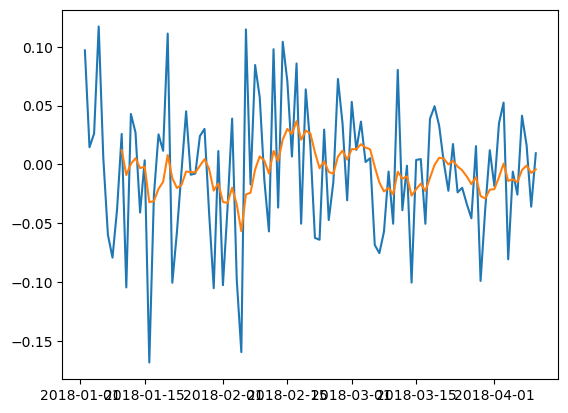

In [10]:
plt.plot(df_day_diff.close[:100])
plt.plot(ta.ema(df_day_diff.close, length = 10)[:100])
plt.plot(ta.ema(df_day_diff.close, length = 20)[:100])
plt.plot(ta.ema(df_day_diff.close, length = 30)[:100])

In [7]:
df_day_diff.corr()

,open,high,low,close,Volume_BTC,fng_value,RSI,EMA
open,1.000000,0.540783,0.424348,-0.031448,-0.013775,0.524185,0.245026,-0.021312
high,0.540783,1.000000,0.435138,0.550930,0.011712,0.306515,0.296313,-0.026883
low,0.424348,0.435138,1.000000,0.588135,-0.066262,0.229803,0.250108,-0.022619
close,-0.031448,0.550930,0.588135,1.000000,-0.023683,-0.029484,0.265907,-0.025282
Volume_BTC,-0.013775,0.011712,-0.066262,-0.023683,1.000000,-0.011365,0.111532,-0.476316
fng_value,0.524185,0.306515,0.229803,-0.029484,-0.011365,1.000000,0.119223,-0.021740
RSI,0.245026,0.296313,0.250108,0.265907,0.111532,0.119223,1.000000,-0.000450
EMA,-0.021312,-0.026883,-0.022619,-0.025282,-0.476316,-0.021740,-0.000450,1.000000


## Train-Test Split (Daily)

In [13]:
class preprocessing():
    def __init__(self, df):
        self.df = df
    
    def split(self, df, start, test_start, end):
        """Split df into df_train and df_test by training and testing period"""

        date_index = pd.to_datetime(df.index)
        mask_train = pd.Series(date_index).between(start, test_start, inclusive="left")
        df_train = df.loc[mask_train.values].copy(deep=True)

        mask_test = pd.Series(date_index).between(test_start, end, inclusive="left")
        df_test = df.loc[mask_test.values].copy(deep=True)

        return df_train, df_test
    
    def m_dist(self, df_train):
        """Compute Mahalanobis distance"""
        
        X = df_train.values
        m = X.mean(axis = 0)
        X_minus_m = X - m
        S = np.cov(X.T)
        S_inv = np.linalg.inv(S)
        maha_dist = np.array([X_minus_m[i]@S_inv@X_minus_m[i] for i in range(X.shape[0])])
        return maha_dist
    
    def outliers_indexing(self, df_train, quantile = 0.99):
        
        maha_dist = self.m_dist(df_train)
        is_outlier =  (maha_dist > np.quantile(maha_dist, quantile))
        return is_outlier

    def transform(self, df_train, df_test, method = "minmax", y_name = "close"):
        df_train = df_train.copy(deep=True)
        df_test = df_test.copy(deep=True)
        X_names = list(df_train.columns[df_train.columns != y_name])

        if method == "std":
            self.scaler_y = StandardScaler()
            self.scaler = StandardScaler()
        elif method == "minmax":
            self.scaler_y = MinMaxScaler()
            self.scaler = MinMaxScaler()
        
        self.scaler_y.fit(df_train[[y_name]])
        self.scaler.fit(df_train[X_names])
        df_train.loc[:, [y_name]] = self.scaler_y.transform(df_train[[y_name]])
        df_train.loc[:, X_names] = self.scaler.transform(df_train[X_names])
        df_test.loc[:, [y_name]] = self.scaler_y.transform(df_test[[y_name]])
        df_test.loc[:, X_names] = self.scaler.transform(df_test[X_names])

        return df_train, df_test
    
    def generate_dataset(self, df_train, seq_len, y_name = "close"):
        X_list, y_list = [], []
        for i in range(len(df_train.index) - seq_len):
            if df_train.iloc[i:i + 1 + seq_len,:].isna().any(axis = None):
                continue
            X_list.append(np.array(df_train.iloc[i:i+seq_len,:]))
            y_list.append(df_train[y_name].values[i+seq_len])
        return np.array(X_list), np.array(y_list)
    
    def pipeline(self, 
                 split_args = {"start": "2021-10-01", 
                               "test_start": "2021-12-31", 
                               "end" :"2022-01-01"}, 
                 outliers_indexing_args = {"quantile": 0.99}, 
                 transform_args = {"method": "minmax", 
                                   "y_name": "close"}, LAG = 5):
        self.df_train, self.df_test = self.split(self.df, **split_args)
        self.is_outlier = self.outliers_indexing(self.df_train, **outliers_indexing_args)
        self.df_train.iloc[self.is_outlier, :] = np.nan
        self.df_train_transformed, self.df_test_transformed = self.transform(self.df_train, self.df_test, **transform_args)
        
        # Add LAG number of observations in training dataset to test dataset
        df_test_LAG = pd.concat((self.df_train_transformed.iloc[-LAG:,:], self.df_test_transformed), axis=0)

        self.X_train, self.y_train = self.generate_dataset(self.df_train_transformed, seq_len=LAG)
        self.X_test, self.y_test = self.generate_dataset(df_test_LAG, seq_len=LAG)

In [11]:
df_day_diff[["close", "Volume_BTC", "fng_value", "RSI", "EMA", "EMA_return"]]

,close,Volume_BTC,fng_value,RSI,EMA,EMA_return
2018-01-01,NaN,13.532534,NaN,NaN,NaN,NaN
2018-01-02,0.097011,13.932804,NaN,NaN,NaN,NaN
2018-01-03,0.014611,13.919800,NaN,NaN,NaN,NaN
2018-01-04,0.026196,14.149431,NaN,NaN,NaN,NaN
2018-01-05,0.117333,14.128750,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-06,NaN,NaN,75.0,51.750421,41886.577281,-0.001882
2024-04-07,NaN,NaN,78.0,51.750421,41886.577281,-0.001882
2024-04-08,NaN,NaN,76.0,51.750421,41886.577281,-0.001882
2024-04-09,NaN,NaN,80.0,51.750421,41886.577281,-0.001882


In [205]:
split_args = {"start": "2018-01-01", 
              "test_start": "2023-01-01", 
              "end" :"2024-01-01"}

transform_args = {"method": "std", 
                  "y_name": "close"}
df_input = df_day_diff[["close", "Volume_BTC", "fng_value", "RSI", "EMA", "EMA_return"]]

pp_day_5 = preprocessing(df_input)
pp_day_5.pipeline(LAG = 5, split_args = split_args, transform_args = transform_args)

pp_day_10 = preprocessing(df_input)
pp_day_10.pipeline(LAG = 10, split_args = split_args, transform_args = transform_args)

pp_day_30 = preprocessing(df_input)
pp_day_30.pipeline(LAG = 30, split_args = split_args, transform_args = transform_args)

pp_day_120 = preprocessing(df_input)
pp_day_120.pipeline(LAG = 120, split_args = split_args, transform_args = transform_args)

In [207]:
X_train_day_5 = pp_day_5.X_train
X_test_day_5 = pp_day_5.X_test
y_train_day_5 = pp_day_5.y_train
y_test_day_5 = pp_day_5.y_test

X_train_day_10 = pp_day_10.X_train
X_test_day_10 = pp_day_10.X_test
y_train_day_10 = pp_day_10.y_train
y_test_day_10 = pp_day_10.y_test

X_train_day_30 = pp_day_30.X_train
X_test_day_30 = pp_day_30.X_test
y_train_day_30 = pp_day_30.y_train
y_test_day_30 = pp_day_30.y_test

X_train_day_120 = pp_day_120.X_train
X_test_day_120 = pp_day_120.X_test
y_train_day_120 = pp_day_120.y_train
y_test_day_120 = pp_day_120.y_test

# Model

In [155]:
print(np.mean(y_train))
print(np.mean((y_train - np.mean(y_train))**2))
print(np.mean((y_test - np.mean(y_train))**2)**0.5)
print(np.mean((y_test - np.mean(y_test))**2))

0.5209902385970642
0.005115655311647604
0.06618702001498293
0.0043801554826098


In [265]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, AveragePooling1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

In [184]:
metrics = [
    tf.keras.metrics.MeanAbsoluteError(name='mae'),
    tf.keras.metrics.RootMeanSquaredError(name='rmse')
]
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]

def model_builder_lstm(hp):
    hp_lstm_depth = hp.Int('lstm_depth', min_value=2, max_value=8, step=2)
    hp_lstm_size = hp.Choice('lstm_size', values = [8, 16, 32, 64, 128])
    hp_lstm_dropout = hp.Choice('lstm_dropout', values = [0.2, 0.5, 0.8])

    hp_dense_depth = hp.Int('dense_depth', min_value=1, max_value=7, step=2)
    hp_dense_size = hp.Choice('dense_size', values = [8, 16, 32, 64, 128])
    hp_dense_dropout = hp.Choice('dense_dropout', values = [0.2, 0.5, 0.8])

    hp_lr = hp.Choice('learning_rate', values = [0.005, 0.001, 0.0005])
    
    model = Sequential()
    for i in range(hp_lstm_depth-1):
        model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
    model.add(LSTM(hp_lstm_size, return_sequences=False, dropout = hp_lstm_dropout))
    
    for i in range(hp_dense_depth):
        model.add(Dense(hp_dense_size, activation = "relu"))
        model.add(Dropout(hp_dense_dropout))
    model.add(Dense(1))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_lr),
        loss='mse',
        metrics = metrics
    )

    return model

In [154]:
def model_builder_conv_lstm(hp):
    hp_conv_filters = hp.Choice('conv_filters', values = [8, 16, 32, 64, 128, 256])
    hp_conv_kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=2)
    
    hp_lstm_depth = hp.Int('lstm_depth', min_value=2, max_value=8, step=2)
    hp_lstm_size = hp.Choice('lstm_size', values = [8, 16, 32, 64, 128, 256])
    hp_lstm_dropout = hp.Choice('lstm_dropout', values = [0.2, 0.5, 0.8])

    hp_dense_depth = hp.Int('dense_depth', min_value=1, max_value=7, step=2)
    hp_dense_size = hp.Choice('dense_size', values = [8, 16, 32, 64, 128, 256])
    hp_dense_dropout = hp.Choice('dense_dropout', values = [0.2, 0.5, 0.8])

    hp_lr = hp.Choice('learning_rate', values = [0.005, 0.001, 0.0005])
    
    model = Sequential()
    model.add(Conv1D(hp_conv_filters, hp_conv_kernel_size, padding = "same"))
    model.add(MaxPooling1D(pool_size=2))

    for i in range(hp_lstm_depth-1):
        model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
    model.add(LSTM(hp_lstm_size, return_sequences=False, dropout = hp_lstm_dropout))
    
    for i in range(hp_dense_depth):
        model.add(Dense(hp_dense_size, activation = "relu"))
        model.add(Dropout(hp_dense_dropout))
    model.add(Dense(1))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_lr),
        loss='mse',
        metrics = metrics
    )

    return model

In [197]:
test_close = df_day[(df_day.index >= "2023-01-01")*(df_day.index < "2024-01-01")].close.copy()
naive_pred = df_day[(df_day.index >= "2022-12-31")*(df_day.index < "2023-12-31")].close.values

## Daily

### Lag 5

#### Lstm

In [163]:
tuner_day_5 = kt.RandomSearch(
    model_builder_lstm,
    objective = 'val_loss',
    max_trials = 50,  # Number of different configurations to try
    executions_per_trial = 1,  # Number of models to train for each trial
    seed = 4012,
    overwrite = True
)

In [164]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
tuner_day_5.search(
    X_train_day_5[:(len(X_train_day_5)-100)], y_train_day_5[:(len(y_train_day_5)-100)],
    epochs=50,
    validation_data = (X_train_day_5[-100:], y_train_day_5[-100:]),
    callbacks=callbacks
)

Trial 50 Complete [00h 00m 23s]
val_loss: 0.36974769830703735

Best val_loss So Far: 0.3671029210090637
Total elapsed time: 00h 11m 06s


In [174]:
tf.keras.utils.set_random_seed(4012)
best_hps_day_5 = tuner_day_5.get_best_hyperparameters(num_trials=1)[0]
model_day_5 = tuner_day_5.hypermodel.build(best_hps_day_5)
model_day_5.fit(X_train_day_5, y_train_day_5,
                batch_size=64, epochs=10)
pred_return_day_5 = pp_day_5.scaler_y.inverse_transform(model_day_5.predict(X_test_day_5))[:,0]
pred_close_day_5 = naive_pred*(pred_return_day_5+1)
print(f"naive: {np.mean((test_close - naive_pred)**2)}")
print(f"model_day_5: {np.mean((test_close - pred_close_day_5)**2)}")

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.9641 - mae: 0.6624 - rmse: 0.9780
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9588 - mae: 0.6660 - rmse: 0.9785
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.9589 - mae: 0.6661 - rmse: 0.9786
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.9557 - mae: 0.6638 - rmse: 0.9768
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9536 - mae: 0.6616 - rmse: 0.9758
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.9513 - mae: 0.6608 - rmse: 0.9746
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9486 - mae: 0.6591 - rmse: 0.9732
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9533 - mae: 0.6609 - rmse: 0.9756
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9475 - mae: 0.6581 - rmse: 0.9726
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9496 - mae: 0.6599 - rmse: 0.9737
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
naive: 43

In [179]:
model_day_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 5, 256)         │       269,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,737,157 (33.33 MB)

 Trainable params: 2,912,385 (11.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,824,772 (22.22 MB)

### Lag 10

#### Lstm

### Lag 30

#### Lstm

In [195]:
tuner_day_30 = kt.RandomSearch(
    model_builder_lstm,
    objective = 'val_loss',
    max_trials = 50,  # Number of different configurations to try
    executions_per_trial = 1,  # Number of models to train for each trial
    seed = 4012,
    overwrite = True
)

In [196]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
tuner_day_30.search(
    X_train_day_30[:(len(X_train_day_30)-100)], y_train_day_30[:(len(y_train_day_30)-100)],
    epochs=50,
    validation_data = (X_train_day_30[-100:], y_train_day_30[-100:]),
    callbacks=callbacks
)

Trial 50 Complete [00h 00m 39s]
val_loss: 0.3735334277153015

Best val_loss So Far: 0.3689712584018707
Total elapsed time: 00h 16m 35s


In [202]:
tf.keras.utils.set_random_seed(4014)
best_hps_day_30 = tuner_day_30.get_best_hyperparameters(num_trials=1)[0]
model_day_30 = tuner_day_30.hypermodel.build(best_hps_day_30)
model_day_30.fit(X_train_day_30, y_train_day_30,
                batch_size=64, epochs=20)
pred_return_day_30 = pp_day_30.scaler_y.inverse_transform(model_day_30.predict(X_test_day_30))[:,0]
pred_close_day_30 = naive_pred*(pred_return_day_30+1)
print(f"naive: {np.mean((test_close - naive_pred)**2)}")
print(f"model_day_30: {np.mean((test_close - pred_close_day_30)**2)}")

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8710 - mae: 0.6473 - rmse: 0.9586
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8710 - mae: 0.6416 - rmse: 0.9325
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.8713 - mae: 0.6409 - rmse: 0.9327
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8733 - mae: 0.6436 - rmse: 0.9336
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.8721 - mae: 0.6418 - rmse: 0.9331
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8657 - mae: 0.6419 - rmse: 0.9296
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8703 - mae: 0.6432 - rmse: 0.9321
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8744 - mae: 0.6447 - rmse: 0.9342
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8731 - mae: 0.6429 - rmse: 0.9336
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.8747 - mae: 0.6441 - rmse: 0.9345
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/s

In [201]:
best_hps_day_30.values

{'lstm_depth': 8,
 'lstm_size': 64,
 'lstm_dropout': 0.2,
 'dense_depth': 1,
 'dense_size': 64,
 'dense_dropout': 0.2,
 'learning_rate': 0.0005}

In [203]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
tf.keras.utils.set_random_seed(4012)
hp_lstm_depth = 2
hp_lstm_size = 8
hp_lstm_dropout = 0.5

hp_dense_depth = 1
hp_dense_size = 4
hp_dense_dropout = 0.5

hp_lr = 0.001
    
model = Sequential()
model.add(LSTM(hp_lstm_size, return_sequences=True))
model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
model.add(LSTM(hp_lstm_size, return_sequences=False, dropout = hp_lstm_dropout))
model.add(Dense(1))

model.compile(optimizer = Adam(learning_rate = hp_lr), loss='mse', metrics = metrics)
model.fit(X_train_day_5[:(len(y_train_day_5)-100), :, [1,2,3,4]], y_train_day_5[:(len(y_train_day_5)-100)]
          , batch_size=64, epochs=100, shuffle=True, validation_data = (X_train_day_5[-100:, :, [1,2,3,4]], y_train_day_5[-100:]), callbacks = callbacks)
test_close = df_day[(df_day.index >= "2023-01-01")*(df_day.index < "2024-01-01")].close.copy()
naive_pred = df_day[(df_day.index >= "2022-12-31")*(df_day.index < "2023-12-31")].close.values
pred_return = pp_day_5.scaler_y.inverse_transform(model.predict(X_test_day_5[:,:,[1,2,3,4]]))[:,0]
pred_close = naive_pred*(pred_return+1)
print(f"naive: {np.mean((test_close - naive_pred)**2)}")
print(f"model: {np.mean((test_close - pred_close)**2)}")

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.9592 - mae: 0.6574 - rmse: 0.9716 - val_loss: 0.4091 - val_mae: 0.4256 - val_rmse: 0.6905
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9656 - mae: 0.6745 - rmse: 0.9825 - val_loss: 0.4066 - val_mae: 0.4212 - val_rmse: 0.6884
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9643 - mae: 0.6721 - rmse: 0.9818 - val_loss: 0.4062 - val_mae: 0.4205 - val_rmse: 0.6880
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9621 - mae: 0.6724 - rmse: 0.9807 - val_loss: 0.4061 - val_mae: 0.4203 - val_rmse: 0.6879
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9627 - mae: 0.6726 - rmse: 0.9810 - val_loss: 0.4059 - val_mae: 0.4200 - val_rmse: 0.6878
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9626 - mae: 0.6714 - rmse: 0.9809 - val_loss: 0.4059 - val_mae: 0.4198 - val_rmse: 0.6877
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9596 - mae: 0.6708 - rmse: 0.979

In [146]:
X_train_day_5

(1782, 5, 6)

In [144]:
df_day_diff

,open,high,low,close,Volume_BTC,fng_value,RSI,EMA,EMA_return
2018-01-01,NaN,NaN,NaN,NaN,13.532534,NaN,NaN,NaN,NaN
2018-01-02,-0.034523,0.094415,0.000677,0.097011,13.932804,NaN,NaN,NaN,NaN
2018-01-03,0.099317,0.008301,0.127693,0.014611,13.919800,NaN,NaN,NaN,NaN
2018-01-04,0.019528,0.010717,-0.021712,0.026196,14.149431,NaN,NaN,NaN,NaN
2018-01-05,0.013523,0.124875,0.046866,0.117333,14.128750,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-06,NaN,NaN,NaN,NaN,NaN,75.0,51.750421,41886.577281,-0.001882
2024-04-07,NaN,NaN,NaN,NaN,NaN,78.0,51.750421,41886.577281,-0.001882
2024-04-08,NaN,NaN,NaN,NaN,NaN,76.0,51.750421,41886.577281,-0.001882
2024-04-09,NaN,NaN,NaN,NaN,NaN,80.0,51.750421,41886.577281,-0.001882


In [138]:
len(y_train_day_5)

1782

In [40]:
model.add(BatchNormalization())

<Sequential name=sequential_12, built=True>

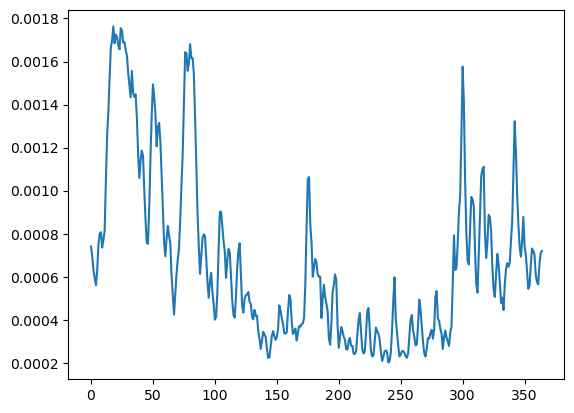

In [204]:
plt.plot(pred_return)

In [48]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 30, 8)          │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 30, 8)          │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 30, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 30, 8)          │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,621 (25.87 KB)

 Trainable params: 2,185 (8.54 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 4,372 (17.08 KB)

#### Conv1D-Lstm

In [335]:
tuner_day_30_CL = kt.RandomSearch(
    model_builder_conv_lstm,
    objective='val_loss',
    max_trials=30,  # Number of different configurations to try
    executions_per_trial=1,  # Number of models to train for each trial
    seed = 4012,
    overwrite=True
)

In [336]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
tuner_day_30_CL.search(
    X_train_day_30, y_train_day_30,
    epochs=50,
    validation_split = 0.1,
    callbacks=callbacks
)

Trial 30 Complete [00h 00m 10s]
val_loss: 0.529258668422699

Best val_loss So Far: 0.526638388633728
Total elapsed time: 00h 08m 40s


In [141]:
tf.keras.utils.set_random_seed(4012)
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
best_hps_CL = tuner_day_30_CL.get_best_hyperparameters(num_trials=1)[0]
model_CL = tuner_day_30_CL.hypermodel.build(best_hps_CL)
model_CL.fit(X_train_day_30, y_train_day_30, batch_size=64, epochs=5)
test_close = df_day[(df_day.index >= "2023-01-01")*(df_day.index < "2024-01-01")].close.copy()
naive_pred = df_day[(df_day.index >= "2022-12-31")*(df_day.index < "2023-12-31")].close.values
pred_return = pp_day_30.scaler_y.inverse_transform(model_CL.predict(X_test_day_30))[:,0]
pred_close = naive_pred*(pred_return+1)
print(f"naive: {np.mean((test_close - naive_pred)**2)}")
print(f"model: {np.mean((test_close - pred_close)**2)}")

NameError: name 'tuner_day_30_CL' is not defined

In [368]:
print(f"naive: {np.mean(abs(naive_pred/test_close-1))}")
print(f"model: {np.mean(abs(pred_close/test_close-1))}")

naive: 0.015177906984877114
model: 0.015209226193191367


In [340]:
best_hps.values

{'conv_filters': 8,
 'kernel_size': 7,
 'lstm_depth': 6,
 'lstm_size': 256,
 'lstm_dropout': 0.5,
 'dense_depth': 3,
 'dense_size': 128,
 'dense_dropout': 0.2,
 'learning_rate': 0.0001}

### Lag 120

In [302]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]
tf.keras.utils.set_random_seed(4013)
hp_conv_filters = 64
hp_conv_kernel_size = 31

hp_lstm_depth = 2
hp_lstm_size = 32
hp_lstm_dropout = 0.8

hp_dense_depth = 1
hp_dense_size = 32
hp_dense_dropout = 0.8

hp_lr = 0.0005
   
model = Sequential()
model.add(Conv1D(hp_conv_filters, hp_conv_kernel_size, padding = "same"))
model.add(AveragePooling1D(pool_size=2)) 

model.add(Conv1D(hp_conv_filters, 15, padding = "same"))
model.add(AveragePooling1D(pool_size=2))

model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
model.add(LSTM(hp_lstm_size, return_sequences=True, dropout = hp_lstm_dropout))
model.add(LSTM(hp_lstm_size, return_sequences=False, dropout = hp_lstm_dropout))

model.add(Dense(hp_dense_size, activation = "relu"))
model.add(Dropout(hp_dense_dropout))
model.add(Dense(hp_dense_size, activation = "relu"))
model.add(Dropout(hp_dense_dropout))
model.add(Dense(1))

model.compile(optimizer = Adam(learning_rate = hp_lr), loss='mse', metrics = metrics)
model.fit(X_train_day_120, y_train_day_120
          , batch_size=64, epochs=100, shuffle=True, validation_data = (X_test_day_120, y_test_day_120), callbacks = None)
test_close = df_day[(df_day.index >= "2023-01-01")*(df_day.index < "2024-01-01")].close.copy()
naive_pred = df_day[(df_day.index >= "2022-12-31")*(df_day.index < "2023-12-31")].close.values
pred_return = pp_day_120.scaler_y.inverse_transform(model.predict(X_test_day_120))[:,0]
pred_close = naive_pred*(pred_return+1)
print(f"naive: {np.mean((test_close - naive_pred)**2)}")
print(f"model: {np.mean((test_close - pred_close)**2)}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.6078 - mae: 0.7251 - rmse: 1.0759 - val_loss: 0.3548 - val_mae: 0.4003 - val_rmse: 0.5970
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3979 - mae: 0.8260 - rmse: 1.1813 - val_loss: 0.3559 - val_mae: 0.3994 - val_rmse: 0.5980
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2861 - mae: 0.8025 - rmse: 1.1336 - val_loss: 0.3556 - val_mae: 0.4000 - val_rmse: 0.5977
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2785 - mae: 0.8039 - rmse: 1.1303 - val_loss: 0.3563 - val_mae: 0.3997 - val_rmse: 0.5982
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1824 - mae: 0.7634 - rmse: 1.0869 - val_loss: 0.3565 - val_mae: 0.3989 - val_rmse: 0.5983
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1304 - mae: 0.7351 - rmse: 1.0625 - val_loss: 0.3572 - val_mae: 0.3991 - val_rmse: 0.5988
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0726 - mae: 0.7220 - rmse:

In [303]:
feature_extractor = tf.keras.Model(
    inputs= model.inputs,
    outputs=[layer.output for layer in model.layers],
)

# Call feature extractor on test input.
x = X_train_day_120
features = feature_extractor(x)

In [305]:
conv_out = np.array(features[1])

In [308]:
conv_out[0,0,:]

array([-0.5315848 , -0.21858472,  0.0363284 , -0.41186708,  0.23668115,
        0.5214778 ,  0.00257657,  0.3846956 , -0.29069442, -0.2699097 ,
        0.34909987,  0.27215675, -0.15261565, -0.16219117,  0.06584486,
       -0.3428703 , -0.27519995,  0.0343767 ,  0.0340385 , -0.00390295,
        0.42331085,  0.43910047,  0.55098575,  0.5355447 ,  0.03230629,
       -0.22646838, -0.0102107 , -0.5282755 ,  0.5943944 ,  0.09364085,
       -0.19627412, -0.00776936,  1.1471385 , -0.41828746, -0.24241105,
        0.12670685, -0.0200521 , -0.00904432,  0.10321371,  0.08159857,
        0.49652785,  0.32974967, -0.13855301, -0.01985857, -0.47980666,
        0.13392276, -0.01476617,  0.14453444,  0.049753  , -0.2025559 ,
       -0.14799082, -0.31978208, -0.23807816, -0.19024494,  0.3879264 ,
       -0.32397896, -0.18015431, -0.13391478,  0.02244563, -0.08256441,
        0.48274824, -0.12944388,  0.1590339 , -0.32073677], dtype=float32)

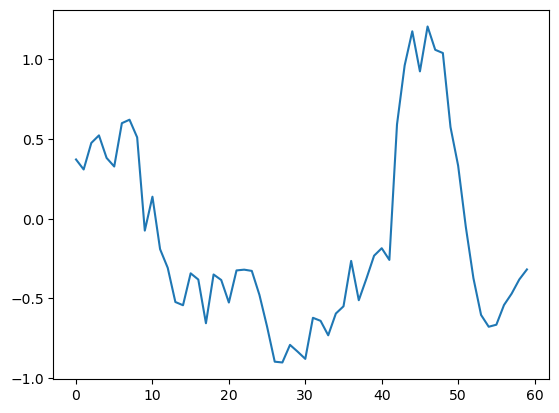

In [330]:
plt.plot(conv_out[10,:,1])

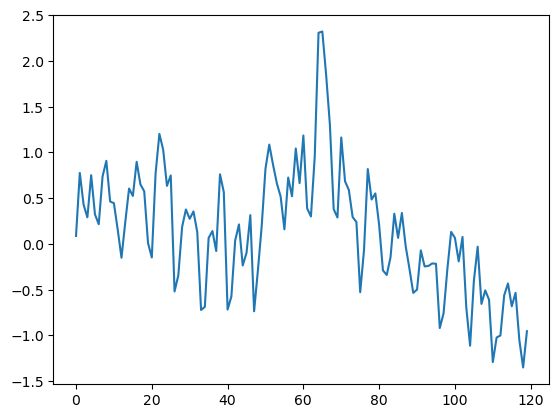

In [325]:
plt.plot(X_test_day_120[2,:,1])

In [ ]:
426260.15959292813

In [246]:
naive_pred

array([16547.49609375, 16625.08007812, 16688.47070312, 16679.85742188,
       16863.23828125, 16836.73632812, 16951.96875   , 16955.078125  ,
       17091.14453125, 17196.5546875 , 17446.29296875, 17934.89648438,
       18869.58789062, 19909.57421875, 20976.29882812, 20880.79882812,
       21169.6328125 , 21161.51953125, 20688.78125   , 21086.79296875,
       22676.55273438, 22777.625     , 22720.41601562, 22934.43164062,
       22636.46875   , 23117.859375  , 23032.77734375, 23078.72851562,
       23031.08984375, 23774.56640625, 22840.13867188, 23139.28320312,
       23723.76953125, 23471.87109375, 23449.32226562, 23331.84765625,
       22955.66601562, 22760.109375  , 23264.29101562, 22939.3984375 ,
       21819.0390625 , 21651.18359375, 21870.875     , 21788.203125  ,
       21808.1015625 , 22220.8046875 , 24307.84179688, 23623.47460938,
       24565.6015625 , 24641.27734375, 24327.64257812, 24829.1484375 ,
       24436.35351562, 24188.84375   , 23947.4921875 , 23198.12695312,
      

In [245]:
pred_close

array([16558.64136993, 16636.9950444 , 16700.48879379, 16692.58513157,
       16876.16220843, 16850.35045606, 16965.70636696, 16969.60046724,
       17105.84861446, 17212.12435446, 17461.82461785, 17951.58148529,
       18886.62057585, 19928.08441369, 20995.07310529, 20899.56230611,
       21187.94922387, 21179.60440701, 20705.52985876, 21103.30322364,
       22693.02907812, 22793.37648137, 22734.80890306, 22948.58554466,
       22649.41064741, 23131.47058528, 23045.08091966, 23092.95496478,
       23044.37541434, 23789.31531853, 22853.08538   , 23151.19680836,
       23735.26573219, 23483.52783286, 23462.33754116, 23346.8726331 ,
       22972.61333747, 22779.83717194, 23286.4415193 , 22964.7097969 ,
       21847.29147366, 21684.33424307, 21908.61177883, 21829.83874513,
       21851.95377936, 22268.06683126, 24361.24968435, 23679.85086849,
       24627.3068884 , 24706.05735126, 24394.83455454, 24899.69090351,
       24508.81248109, 24261.97019452, 24023.28615923, 23272.57238884,
      

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


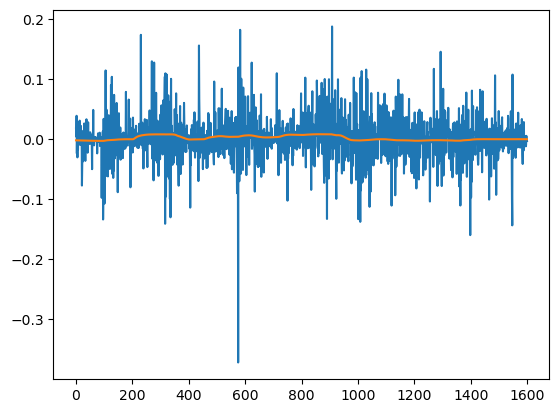

In [299]:
plt.plot(pp_day_120.scaler_y.inverse_transform(y_train_day_120.reshape((-1,1)))[:,0])
plt.plot(pp_day_120.scaler_y.inverse_transform(model.predict(X_train_day_120))[:,0])

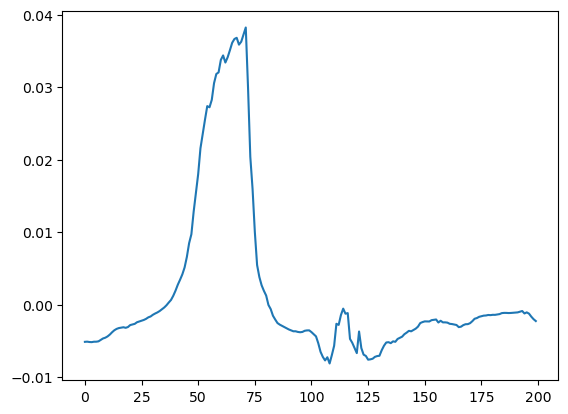

In [282]:
plt.plot(pred_return[:200])

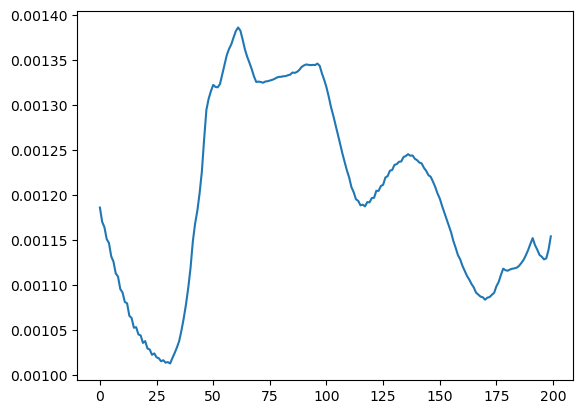

In [271]:
plt.plot(pred_return[:200])

In [297]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (64, 120, 64)          │        11,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_14            │ (64, 60, 64)           │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (64, 60, 64)           │        61,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_15            │ (64, 30, 64)           │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_134 (LSTM)                 │ (64, 30, 32)           │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_135 (LSTM)                 │ (64, 30, 32)           │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (64, 32)               │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (64, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (64, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (64, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (64, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (64, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,021 (1.20 MB)

 Trainable params: 104,673 (408.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,348 (817.77 KB)

# result

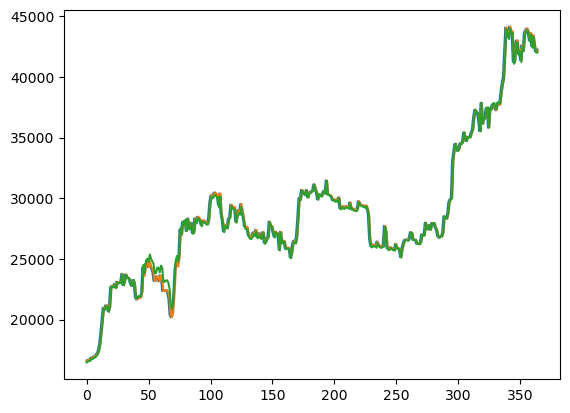

In [283]:
plt.plot(test_close.values)
plt.plot(naive_pred)
plt.plot(pred_close)

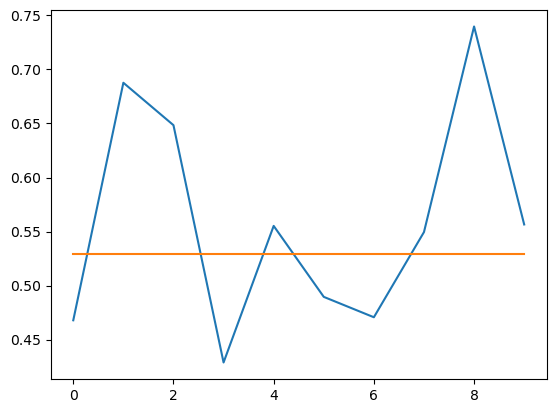

In [229]:
from matplotlib import pyplot as plt
plt.plot(y_test[:10])
plt.plot(LSTM_pred[:10])

In [120]:
y_test

array([0.47907782, 0.70409165, 0.66390678, ..., 0.48045181, 0.43266537,
       0.58660623])

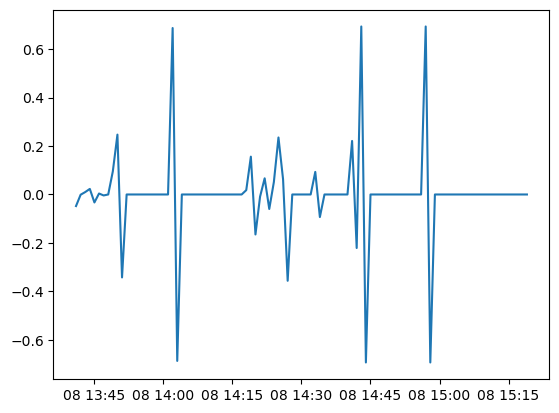

In [412]:
plt.plot(df_diff.Volume_BTC[:100])

In [413]:
df_diff.corr()

,return,Volume_BTC
return,1.000000,-0.014384
Volume_BTC,-0.014384,1.000000


In [402]:
LSTM_pred[:10] - LSTM_pred.mean()

array([-3.5762787e-07, -1.1920929e-07, -1.7881393e-07, -1.1920929e-07,
        0.0000000e+00, -5.3644180e-07, -8.9406967e-07, -8.9406967e-07,
       -8.9406967e-07, -7.7486038e-07], dtype=float32)

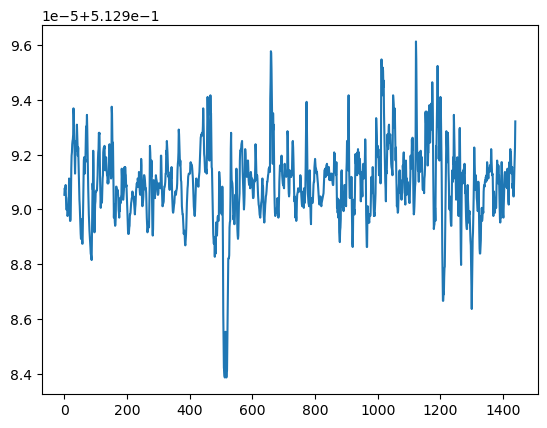

In [394]:
plt.plot(LSTM_pred)